In [1]:
pip install mdtraj


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


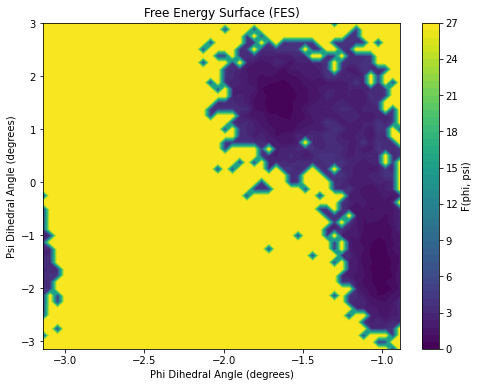

In [3]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory file
traj = md.load("adpT.trr", top="adpT.gro")

# Compute the phi and psi dihedral angles
phi_indices, phi_angles=md.compute_phi(traj)
psi_indices, psi_angles=md.compute_psi(traj)

# 2D histogram
histogram, xedges, yedges = np.histogram2d(phi_angles.ravel(), psi_angles.ravel(), bins=50)

# Avoid log(0) by adding a small number
histogram += 1e-10

# Compute the free energy surface
F = -np.log(histogram)

# Subtract the minimum free energy
F -= F.min()

# Create a contour plot of the FES
plt.figure(figsize=(8, 6))
plt.contourf(xedges[:-1], yedges[:-1], F, cmap="viridis", levels=50)
plt.xlabel("Phi Dihedral Angle (degrees)")
plt.ylabel("Psi Dihedral Angle (degrees)")
plt.title("Free Energy Surface (FES)")
plt.colorbar(label="F(phi, psi)")
# Save the figures to the 'Figures' directory
plt.savefig('../Figures/free_energy.png')
plt.show()
